In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\AKHIL\Documents\Retail_Sales_Data.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
print(df.isnull().sum())
print(df.dtypes)


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [3]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

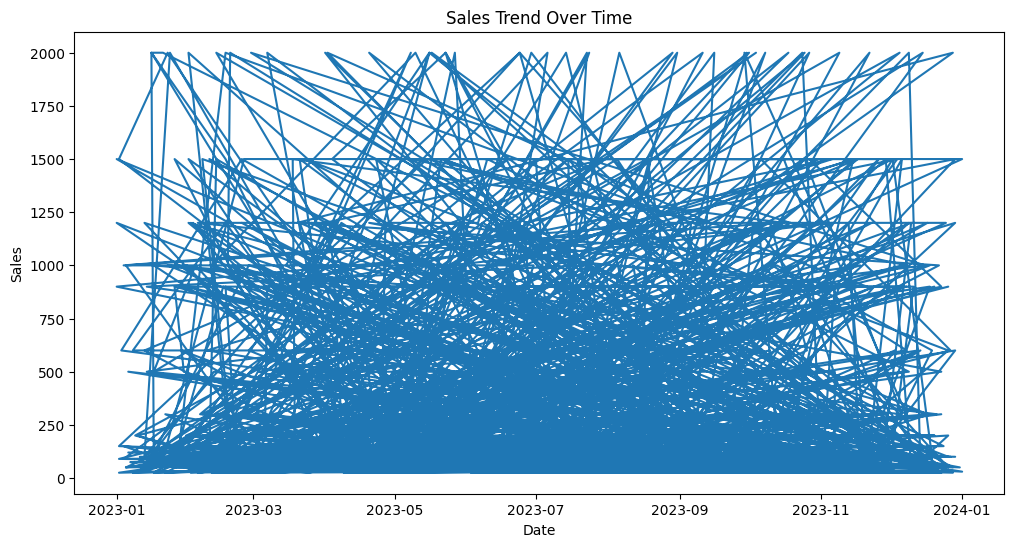

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Amount'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

In [6]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.isocalendar().week

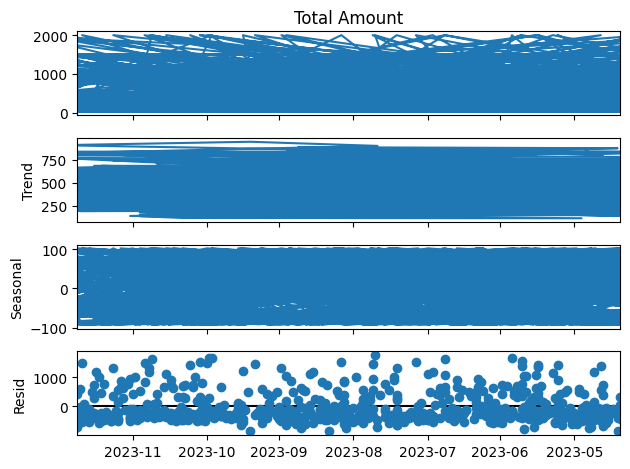

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Total Amount'], model='additive', period=12)
result.plot()
plt.show()


In [9]:
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
model = ARIMA(train['Total Amount'], order=(5,1,0))  # (p, d, q) values  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                  800
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6280.347
Date:                Fri, 14 Feb 2025   AIC                          12572.695
Time:                        20:56:59   BIC                          12600.795
Sample:                             0   HQIC                         12583.490
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8236      0.036    -22.786      0.000      -0.894      -0.753
ar.L2         -0.6351      0.045    -14.150      0.000      -0.723      -0.547
ar.L3         -0.4807      0.048    -10.056      0.0

c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


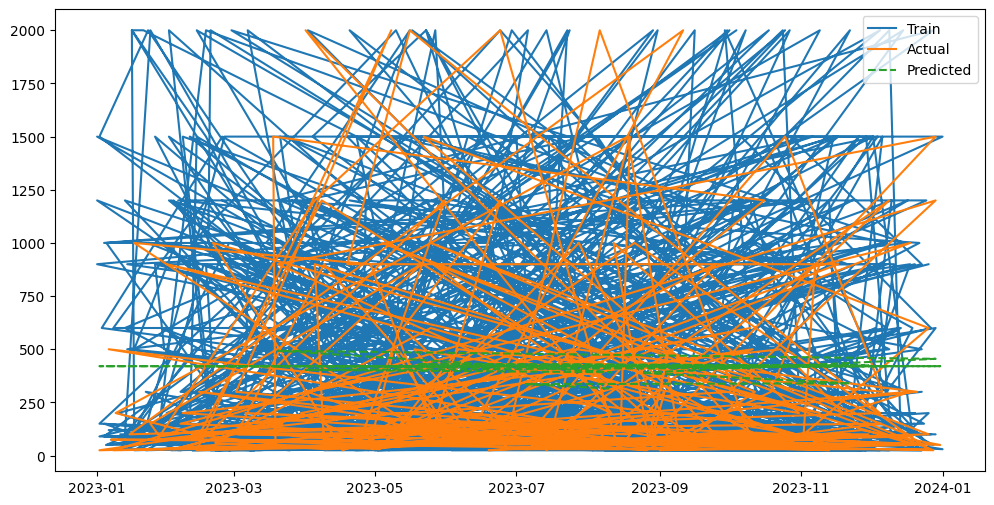

In [13]:
predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Total Amount'], label='Train')
plt.plot(test.index, test['Total Amount'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', linestyle='dashed')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


actual = df['Total Amount'][-30:]
predicted = predictions[:30] 
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 327.69
RMSE: 350.31


In [16]:
import pickle

with open('sales_forecasting_model.pkl', 'wb') as model_file:
    pickle.dump(model_fit, model_file)

In [17]:
with open('sales_forecasting_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

future_predictions = loaded_model.forecast(steps=30)


c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Total Amount'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Data is NOT stationary. Differencing required.")
else:
    print("Data is stationary. No differencing needed.")

ADF Statistic: -31.776013873379462
p-value: 0.0
Data is stationary. No differencing needed.


In [22]:
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [23]:
print(df.index.duplicated().sum())

655


In [24]:
df = df.reset_index(drop=True)

In [25]:
df['Total Amount'] = df['Total Amount'].diff().dropna()

In [26]:
print(df.isnull().sum())

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        1
year                0
month               0
day                 0
day_of_week         0
week_of_year        0
dtype: int64


In [27]:
df['Total Amount'] = df['Total Amount'].fillna(method='ffill').diff().dropna()

C:\Users\AKHIL\AppData\Local\Temp\ipykernel_24520\2303963493.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total Amount'] = df['Total Amount'].fillna(method='ffill').diff().dropna()


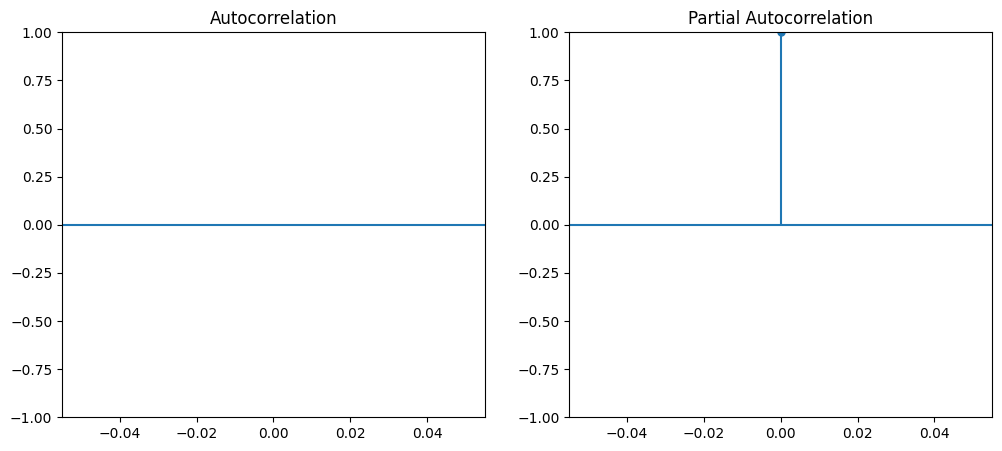

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Total Amount'], ax=axes[0])   
plot_pacf(df['Total Amount'], ax=axes[1]) 
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 2 
model = ARIMA(df['Total Amount'], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())

c:\Users\AKHIL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                 1000
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7950.505
Date:                Fri, 14 Feb 2025   AIC                          15909.011
Time:                        21:29:47   BIC                          15928.638
Sample:                             0   HQIC                         15916.471
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4996      0.026    -19.202      0.000      -0.551      -0.449
ma.L1         -2.0000      0.041    -48.288      0.000      -2.081      -1.919
ma.L2          1.0000      0.041     24.126      0.0

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Try an AR(2) model (p=2, d=1, q=0)
model = ARIMA(df['Total Amount'], order=(2,1,0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                 1000
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8597.634
Date:                Fri, 14 Feb 2025   AIC                          17201.268
Time:                        21:31:29   BIC                          17215.988
Sample:                             0   HQIC                         17206.863
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1986      0.024    -49.621      0.000      -1.246      -1.151
ar.L2         -0.5927      0.024    -24.520      0.000      -0.640      -0.545
sigma2      1.777e+06   7.31e+04     24.322      0.0

In [32]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)


1000    22.347740
1001   -29.208786
1002   -28.069628
1003     1.120390
1004   -34.542349
1005    -9.096160
1006   -18.460519
1007   -22.317162
1008   -12.144660
1009   -22.051905
1010   -16.205751
1011   -17.341425
1012   -19.444963
1013   -16.250563
1014   -18.832740
1015   -17.630892
1016   -17.541096
1017   -18.361013
1018   -17.431466
1019   -18.059704
1020   -17.857592
1021   -17.727516
1022   -18.003211
1023   -17.749849
1024   -17.890139
1025   -17.872143
1026   -17.810570
1027   -17.895038
1028   -17.830285
1029   -17.857838
Name: predicted_mean, dtype: float64


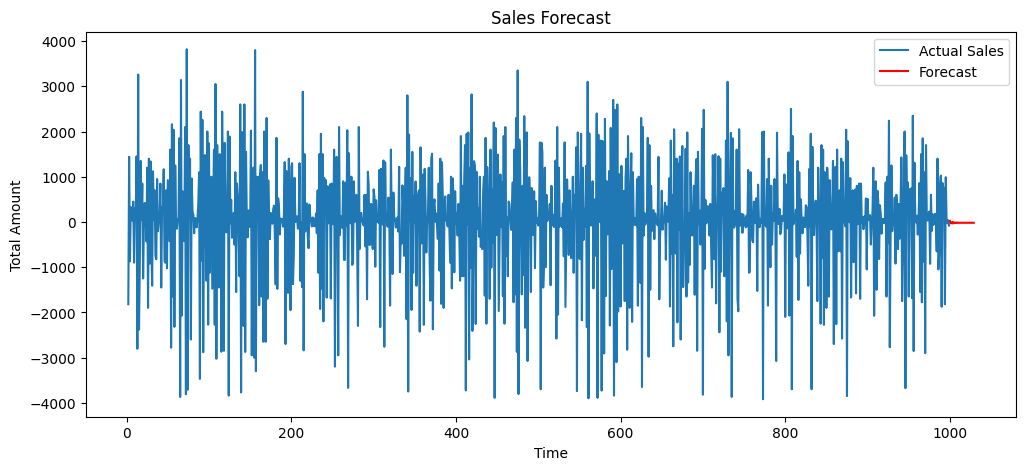

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Total Amount'], label='Actual Sales')
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Total Amount')
plt.title('Sales Forecast')
plt.legend()
plt.show()